In [166]:
import json
import pandas as pd
import numpy as np
import datetime
import helpers
import SessionSet
import model_evaluation
from importlib import reload

In [107]:
reload(helpers)
json_data = json.load(open('./city_search.json'))
helpers.preprocess_json_for_pandas(json_data)
df = pd.io.json.json_normalize(json_data)
df['time_of_day'] = pd.Series(df['unix_timestamp'] % helpers.SECONDS_PER_DAY)
df['session_date'] = df.apply(lambda row: datetime.datetime.utcfromtimestamp(row['unix_timestamp']), axis=1)
df['month'] = df.apply(lambda row: row['session_date'].month, axis=1)
df['year'] = df.apply(lambda row: row['session_date'].year, axis=1)
df['request_count'] = df.apply(lambda row: len(row['cities']), axis=1)
df.replace('','??', inplace=True)
df.head()

,cities,session_id,unix_timestamp,user._row,user.country,user.joining_date,user.user_id,time_of_day,session_date,month,year,request_count
0,"[new york ny, newark nj]",X061RFWB06K9V,1442503708,NaN,UK,2015-03-22,2024,55708,2015-09-17 15:28:28,9,2015,2
1,"[new york ny, jersey city nj, philadelphia pa]",5AZ2X2A9BHH5U,1441353991,NaN,DE,2015-03-28,2853,29191,2015-09-04 08:06:31,9,2015,3
2,[san antonio tx],SHTB4IYAX4PX6,1440843490,NaN,UK,2015-03-06,10958,37090,2015-08-29 10:18:10,8,2015,1
3,[edmonton ab],JBRB8MZGTX3M4,1427268063,NaN,IT,2015-03-12,7693,26463,2015-03-25 07:21:03,3,2015,1
4,"[phoenix az, houston tx]",YJCMPURC2FL9C,1430559067,NaN,UK,2015-02-28,7506,34267,2015-05-02 09:31:07,5,2015,2


In [169]:
reload(SessionSet)
reload(model_evaluation)
countries_sessions = {} 
time_summary_df = pd.DataFrame()
for country in set(df['user.country'].values):
    countries_sessions[country] = SessionSet.SessionSet(df.loc[df.loc[:,'user.country'] == country ,:], country)
    time_summary_df[country] = countries_sessions[country].get_time_metrics()
countries_sessions['ALL'] = SessionSet.SessionSet(df,'ALL')
time_summary_df['ALL'] = countries_sessions['ALL'].get_time_metrics()
time_summary_df = time_summary_df.T

In [170]:
model_evaluation.compute_generalization_error_estimate(countries_sessions['ALL'])

13347 6675
13348 6674
13349 6673
13347 6675
13348 6674
13349 6673
13347 6675
13348 6674
13349 6673
13347 6675
13348 6674
13349 6673
13347 6675
13348 6674
13349 6673


10010 10012
10012 10010
10010 10012
10012 10010


In [159]:
diag = np.diag(log_proba.values)
sequence = ['toledo oh']
ll = np.zeros((1,89))
for city in sequence:
    ll = ll + log_proba.loc[city].values
ll += max(len(sequence),1) * diag
ll = ll * -1
def ciy_to_index(i):
    return list(city_index_mapping.keys())[i]

ordered_list = list(map(ciy_to_index, np.argsort(ll.flatten())))
print(next(city for city in ordered_list if city not in sequence))

windsor on


-0.6931472

In [30]:
reload(helpers)
user_origins = helpers.compute_user_origin_matrix(countries_sessions)
user_origins

,ES,UK,US,??,FR,DE,IT,ALL
ES,569.0,0.0,0.0,0.0,0.0,0.0,0.0,569.0
UK,0.0,1043.0,0.0,0.0,0.0,0.0,0.0,1043.0
US,0.0,0.0,1129.0,0.0,0.0,0.0,0.0,1129.0
??,0.0,0.0,0.0,792.0,0.0,0.0,0.0,792.0
FR,0.0,0.0,0.0,0.0,665.0,0.0,0.0,665.0
DE,0.0,0.0,0.0,0.0,0.0,1051.0,0.0,1051.0
IT,0.0,0.0,0.0,0.0,0.0,0.0,528.0,528.0
ALL,569.0,1043.0,1129.0,792.0,665.0,1051.0,528.0,5777.0


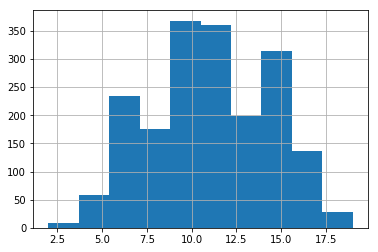

In [17]:
(countries_sessions['IT'].df['time_of_day']//helpers.SECONDS_PER_HOUR).hist()

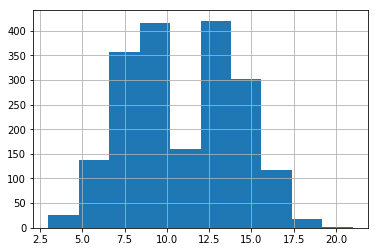

In [18]:
(countries_sessions['ES'].df['time_of_day']//helpers.SECONDS_PER_HOUR).hist()

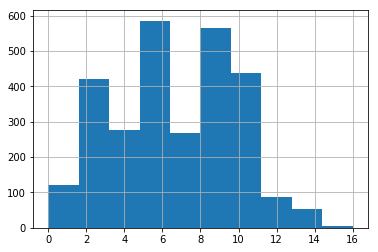

In [19]:
(countries_sessions['??'].df['time_of_day']//helpers.SECONDS_PER_HOUR).hist()

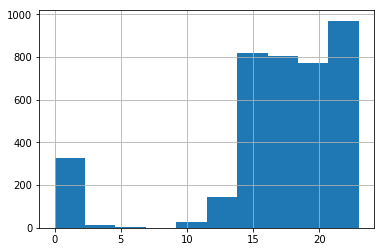

In [20]:
(countries_sessions['US'].df['time_of_day']//helpers.SECONDS_PER_HOUR).hist()